In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [14]:
# this is installed--need to fix

from .wordcloud import WordCloud, STOPWORDS, random_color_func, get_single_color_func
from .color_from_image import ImageColorGenerator

__all__ = ['WordCloud', 'STOPWORDS', 'random_color_func', 'get_single_color_func', 'ImageColorGenerator']


ValueError: Attempted relative import in non-package

In [3]:
# which characters do I want to make clouds for
# populate with top female characters

cloud_char = {"Marge": 1, "Lisa": 9, "Edna Krabappel-Flanders": 40,
                     "Selma": 22, "Patty": 10, 
                    }

In [5]:
# import csv from previous notebook where I saved new df 

df_script = pd.read_csv('gender_included_df.csv', encoding='utf-8')

/Users/Driz/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,5,6,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# also look into masked word cloud 
# need to use illustrator to make masks for characters in cloud_char

def draw_wc(character, data, add_stopwds):
     # Get lines from the cloud_char:
    chosen_char_id = cloud_char_index[character]
    df_charac = df_script[df_script["character_id"]==str(chosen_char_id)]
    char_lines = list(df_script["normalized_text"].values.astype(str))
    # Transform into one big string:
    char_lines_one_str = ' '.join(char_lines)
    # Build the stopwords set:
    stopwords = set(STOPWORDS)
    for w in add_stopwds:
        stopwords.add(w)
    # Instanciate the Wordcloud object:
    wc = WordCloud(background_color="black",
                   max_words=200,
                   stopwords=stopwords,
                   relative_scaling=0.5,
                   width=500,
                   height=350)
    # Generate the wordcloud using the big string:
    wc.generate(char_lines_one_str)
    return wc

In [11]:
def plot_wordcloud(character):
    char_wc = draw_wc(character, data_script_lines, ADDITIONAL_STOPWORDS)
    fig, ax = plt.subplots(figsize=(8,8))
    plt.imshow(char_wc)
    plt.title(character, fontsize=32)
    plt.axis("off")

In [67]:
# plot_wordcloud("Lisa")
# plot_wordcloud("Marge")

In [16]:
df_script.head(2)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,gender
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,f
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0,f


In [21]:
df_script.dropna(inplace=True)

In [28]:
# want to isolate top female characters
# Marge Simpson Lisa Simpson Edna Krabappel-Flanders Selma Bouvier

df_script['raw_character_text'].value_counts()

Homer Simpson              23008
Marge Simpson              10710
Bart Simpson               10584
Lisa Simpson                9038
C. Montgomery Burns         2490
Moe Szyslak                 2342
Seymour Skinner             2044
Ned Flanders                1793
Chief Wiggum                1622
Krusty the Clown            1478
Milhouse Van Houten         1470
Grampa Simpson              1411
Nelson Muntz                1022
Lenny Leonard                940
Apu Nahasapeemapetilon       882
Waylon Smithers              793
Kent Brockman                743
Carl Carlson                 699
Edna Krabappel-Flanders      634
Dr. Julius Hibbert           578
Barney Gumble                476
Selma Bouvier                468
Mayor Joe Quimby             464
Rev. Timothy Lovejoy         462
Sideshow Bob                 452
Groundskeeper Willie         449
Ralph Wiggum                 441
Gary Chalmers                432
Comic Book Guy               387
Otto Mann                    356
          

In [24]:
questions = df_script['normalized_text'].values
text = ' '.join(questions)

(-0.5, 399.5, 199.5, -0.5)

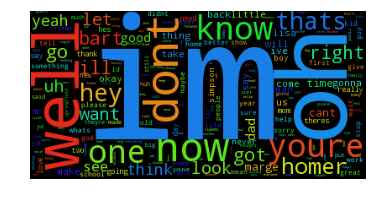

In [26]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

In [48]:
lisa = df_script[df_script['raw_character_text'] == 'Lisa Simpson']

In [49]:
lisa.head(3)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,gender
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0,f
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0,f
9,9558,32,218,Lisa Simpson: (CALLING) Mr. Bergstrom! Mr. Ber...,889000,True,9,374.0,Lisa Simpson,Apartment Building,Mr. Bergstrom! Mr. Bergstrom!,mr bergstrom mr bergstrom,4.0,f


In [50]:
# isolating lisa for cloud
lisa = lisa['normalized_text']

In [56]:
# preparing lisas text for cloud
text_lisa = ' '.join(lisa.values)

(-0.5, 399.5, 199.5, -0.5)

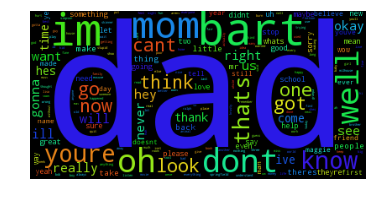

In [65]:
# Generate a word cloud image
lisa_cloud = WordCloud().generate(text_lisa)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(lisa_cloud)
plt.axis("off")

### Homer Word Cloud

In [60]:
homer = df_script[df_script['raw_character_text'] == 'Homer Simpson']
homer = homer['normalized_text']
text_homer = ' '.join(homer.values)

(-0.5, 399.5, 199.5, -0.5)

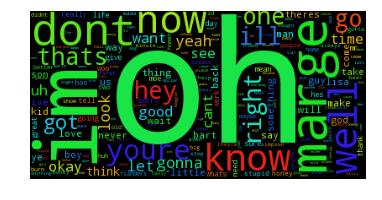

In [62]:
homer_cloud = WordCloud().generate(text_homer)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(homer_cloud)
plt.axis("off")

### Marge Word Cloud

In [63]:
marge = df_script[df_script['raw_character_text'] == 'Marge Simpson']
marge = marge['normalized_text']
text_marge = ' '.join(marge.values)

(-0.5, 399.5, 199.5, -0.5)

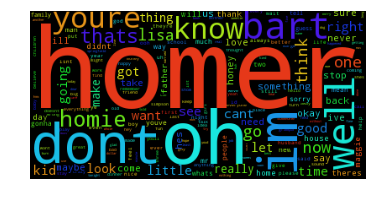

In [64]:
marge_cloud = WordCloud().generate(text_marge)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(marge_cloud)
plt.axis("off")

### Bart Word Cloud

(-0.5, 399.5, 199.5, -0.5)

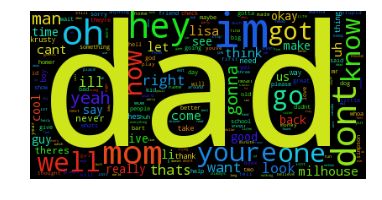

In [68]:
# write function for this


bart = df_script[df_script['raw_character_text'] == 'Bart Simpson']
bart = bart['normalized_text']
text_bart = ' '.join(bart.values)
bart_cloud = WordCloud().generate(text_bart)
plt.imshow(bart_cloud)
plt.axis("off")

### Edna Krabappel-Flanders

(-0.5, 399.5, 199.5, -0.5)

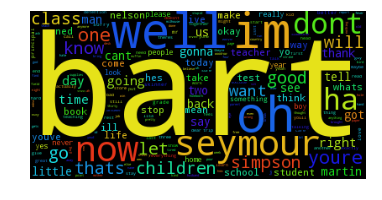

In [69]:
edna = df_script[df_script['raw_character_text'] == 'Edna Krabappel-Flanders']
edna = edna['normalized_text']
text_edna = ' '.join(edna.values)
edna_cloud = WordCloud().generate(text_edna)
plt.imshow(edna_cloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

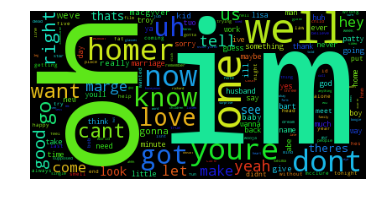

In [70]:
selma = df_script[df_script['raw_character_text'] == 'Selma Bouvier']
selma = selma['normalized_text']
text_selma = ' '.join(selma.values)
selma_cloud = WordCloud().generate(text_selma)
plt.imshow(selma_cloud)
plt.axis("off")